# Multiple Simulations Iteration for Bikeshare

<br>



---



In Notebook 1.2.6, we swept through the parameter of the number of initial bikes at Augie to see how this affected our metric, the number of unhappy customers.  Ideally we could use this model to optimize our system to produce the fewest number of unhappy customers.

<br>  

However, because our simulations are random, the results vary from one run to another, and the results of a parameter sweep tend to be noisy.  We can get a clearer picture of the relationship between a parameter and a metric by running multiple simulations with the same parameter and taking the average of the results.  

<br>

The code below does just that: it sweeps through our independent variable (`iAug`, the number of initial bikes at Augie), but runs a bunch of simulations for each value of `iAug` and averages the results.  This helps to eliminate noise.

<br>

Run the two cells below, and make sure you understand the resulting plot.

In [ ]:
import pandas as pd
import numpy as np
import numpy.random as npr

def run_simulation(p1, p2, iAug, iMol, num_steps):
    state = pd.Series(dict(augie=iAug,moline=iMol,augie_empty=0,moline_empty=0,
                           clock=0),name="Number of Bikes")
    for i in range(num_steps):
        change_func(state, p1, p2)
    return state


def run_multiple_simulations(p1, p2, iAug, iMol, num_steps,num_runs):
    unhappy = pd.Series([], name = 'Number of Unhappy Customers', dtype=object)

    for i in range(num_runs):
        final_state = run_simulation(p1, p2, iAug, iMol, num_steps)
        unhappy[i] = final_state.augie_empty + final_state.moline_empty
    return unhappy

def sweep_bikeshare(p1, p2, total_bikes, num_steps,num_runs):
    unhappy_ave = pd.Series([], name = 'Average Number of Unhappy Customers',dtype=object)

    for i in range(total_bikes+1):
        unhappy = run_multiple_simulations(p1,p2,i,total_bikes-i,num_steps,num_runs)
        unhappy_ave[i]= unhappy.mean()
    unhappy_ave.plot(xlabel='Initial Bikes at Augie', ylabel=unhappy_ave.name,
            title='Augie-Moline Bikeshare', color='C1',legend=False,
            linestyle='--',marker='.');
    return unhappy_ave

def bike_to_augie(state):
    if state.moline > 0:
        state.moline -= 1
        state.augie += 1
    else:
        state.moline_empty +=1
    return state

def bike_to_moline(state):
    if state.augie > 0:
        state.moline += 1
        state.augie -= 1
    else:
        state.augie_empty +=1
    return state

def change_func(state, p1, p2):
    if npr.random() < p1:
        bike_to_moline(state)

    if npr.random() < p2:
        bike_to_augie(state)

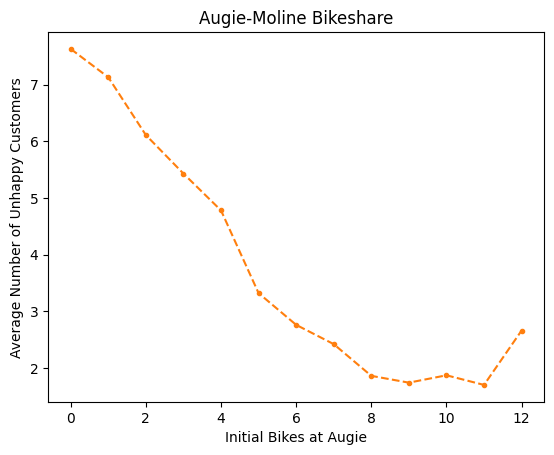

In [ ]:
## Define the parameters
p1 = 0.5
p2 = 0.4
total_bikes = 12
num_steps = 60
num_runs = 100

## Sweep through the initial number of bikes at Augie,
## and plot the average number of unhappy customers
unhappy_ave = sweep_bikeshare(p1, p2, total_bikes, num_steps,num_runs)

## Exercise 1: Understanding the Code

✅ ✅  This code is more complicated than what we have dealt with before, so to understand it, create a code map for the code.  Some reminders and tips:

<br>

* Always start with the "runtime" code: that is, where a function is actually called and not just defined.
* When a "for" loop starts, create a box that says, "Loop through _____.  Is the loop done?" and then have two arrows pointing to "Yes" and "No".
* Since we just want to get the big picture, you don't need to map out what is inside `change_func()`: when you get to that level, just use a box that says "Determine if any bikes move during this time step".

## Exercise 2: Understanding the Plot

✅ ✅ Take a moment and look at the plot created using the original parameter values.  What is the ideal number of bikes to put at Augie in the morning if p1 = 0.5 and p2 = 0.4? Look at the parameters, and explain in a couple sentences why that makes sense.

✅ ✅ Put answer here.

## Exercise 3: Exploring the Model

✅ ✅ Let's play!  Go back and change some of the parameters, one at a time.  Predict the results in your head, and then run the simulation:
* What happens if `p1`=`p2`?  Or if `p1` is significantly different than `p2`?
* What happens if the `p1` and `p2` both get higher? Lower?
* What happens if there are more total bikes?  
* What happens if you run more steps (`num_steps`)?
* What happens if you increase `num_runs` to 500 (the computation will take a bit longer, but not more than a minute or two)?  

✅ ✅ Put answer here.  Comment on at least 3 different scenarios, and try to explain why the results change in the way they do.